## Hall effect experiment part 1 and 3

### Part 1: Magnetic field characterization

In [1]:
# Primero, importamos librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import curve_fit
import sympy as sp

In [2]:
# Extracción los datos tomados

magnetic = pd.read_csv("Campo_magnético.csv",sep=";")
mag_zero = pd.read_csv("Magnetorestencia_campo_nulo.csv",sep=";")
mag_n = pd.read_csv("Magnetorresistencia_n-Ge.csv",sep=";")
mag_p = pd.read_csv("Magnetorresistencia_p-Ge.csv",sep=";")

In [3]:
# Extracción de datos de campo magnético

current = magnetic["Corriente (mA)"].iloc[:]
field = magnetic["Campo magnético (mT)"].iloc[:]

# Paso de lista a numpy array

i_x = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in current])
I_x = np.array([float(i) for i in i_x])
F_y = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in field])

I_error = []
F_error = []

for i in range(0,14):
    I_error.append(0.001)
    F_error.append(0.001)
    

In [4]:
# regresión lineal de el campo en función de la corriente 

I_x = sm.add_constant(I_x)
model = sm.OLS(F_y, I_x)
regression = model.fit()

# Valores de pendiente e intercepto

m = regression.params[1] 
b = regression.params[0]
m_error = round(regression.bse[1],1)
b_error = round(regression.bse[0],1)
symbol = "\u00B1"
eq = f'y = {m:.2f}x {symbol} {m_error:.1f} \n{b:.2f} {symbol} {b_error:.1f}'

# Nos quedamos con los datos que necesitamos para gráficar

I_x = np.array([I_x[i][1] for i in range(len(I_x))])
y_pred = m * I_x + b

# Residuales de la regresión

residuals = regression.resid


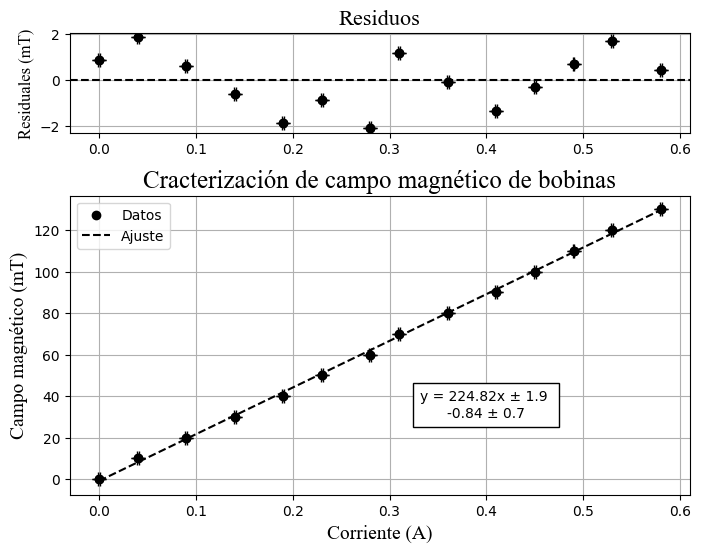

In [23]:
# Gráfico de campo magnético en función de corriente
plt.figure(figsize=(8, 6))

plt.subplot2grid((4, 1), (0, 0), rowspan=1)
plt.scatter(I_x, residuals, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(I_x, residuals, xerr=I_error, yerr=F_error, fmt='o', capsize=5, color="black")
plt.title('Residuos', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.ylabel('Residuales (mT)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplot2grid((3, 1), (1, 0), rowspan=2)
plt.scatter(I_x, F_y, color="black", label="Datos")
plt.plot(I_x, y_pred, linestyle='--', color="black", label="Ajuste")
plt.errorbar(I_x, F_y, xerr=I_error, yerr=F_error, fmt='o', capsize=5, color="black")

plt.xlabel('Corriente (A)',fontfamily='Times New Roman',fontsize=14)
plt.ylabel('Campo magnético (mT)',fontfamily='Times New Roman',fontsize=14)
plt.title('Cracterización de campo magnético de bobinas', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.text(0.4, 30, eq, ha='center', fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
plt.grid()
plt.legend()
plt.savefig("Gráfica campo bobinas")
plt.show()

### Part 3: n-Ge and p-Ge magnetoresistance

#### 1. Null field magnetoresistance

In [12]:
# Extracción de datos de corriente y voltaje para campo nulo para n-Ge y p-Ge

i_n = mag_zero["Ip n-Ge"].iloc[:]
i_p = mag_zero["Ip p-Ge"].iloc[:]
v_n = mag_zero["Vlong n-Ge"].iloc[:]
v_p = mag_zero["Vlong V p-Ge"].iloc[:]

In [20]:
# Dado que la pendiente de la gráfica de voltaje en función de corriente será la  reistencia, entonces, encontraremos la recta
# Paso de lista a numpy array

I_n = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n])
I_p = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p])
V_n = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n])
V_p = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p])

# Errores de las variables de corriente y voltaje

In_error = []
Vn_error = []
Ip_error = []
Vp_error = []

for i in range(0,11):
    In_error.append(0.001)
    Vn_error.append(0.001)
    Ip_error.append(0.001)
    Vp_error.append(0.001)

In [246]:
# Regresión lineal para el n-Ge
I_n = sm.add_constant(I_n)
model_n = sm.OLS(V_n, I_n)
regression = model_n.fit()

# Valores de pendiente e intercepto

m_n = regression.params[1] 
b_n = regression.params[0]
m_n_error = regression.bse[1]
b_n_error = regression.bse[0]
symbol = "\u00B1"
eq_n = f'y = {m_n:.2f}x {symbol} {m_n_error:.1f} + \n{b_n:.2f} {symbol} {b_n_error:.3f}'

# Nos quedamos con los datos que necesitamos para gráficar

I_n = np.array([I_n[i][1] for i in range(len(I_n))])
n_pred = m_n * I_n + b_n

# Residuales de la regresión

n_residuals = regression.resid

n_R0 = m_n
en_R0 = m_n_error

0.20627526450462816


In [65]:
# Regresión lineal para el p-Ge
I_p = sm.add_constant(I_p)
model_p = sm.OLS(V_p, I_p)
regression = model_p.fit()

# Valores de pendiente e intercepto

m_p = regression.params[1] 
b_p = regression.params[0]
m_p_error = regression.bse[1]
b_p_error = regression.bse[0]
symbol = "\u00B1"
eq_p = f'y = {m_p:.2f}x {symbol} {m_p_error:.1f} + \n{b_p:.2f} {symbol} {b_p_error:.3f}'

# Nos quedamos con los datos que necesitamos para gráficar

I_p = np.array([I_p[i][1] for i in range(len(I_p))])
p_pred = m_p * I_p + b_p

# Residuales de la regresión

p_residuals = regression.resid

p_R0 = m_p
ep_R0 = m_p_error

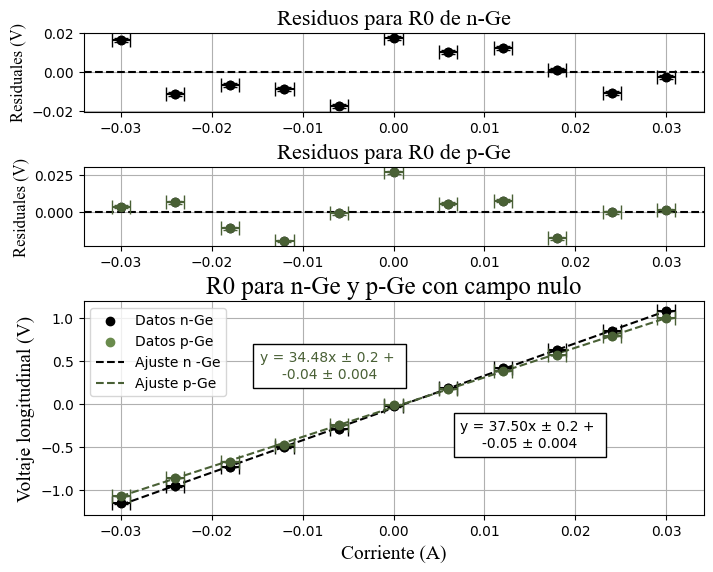

In [66]:
#Gráfico de regresión lineal para ambos tipos de semiconductor con residuales
#La pendiente representa la resistencia longitudinal R0 para campo nulo

plt.figure(figsize=(8, 8))

plt.subplot2grid((5, 1), (0, 0), rowspan=1, colspan=1)
plt.scatter(I_n, n_residuals, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(I_n, n_residuals, xerr=In_error, yerr=Vn_error, fmt='o', capsize=5, color="black")
plt.title('Residuos para R0 de n-Ge', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.ylabel('Residuales (V)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplot2grid((5, 1), (1, 0), rowspan=1, colspan=1)
plt.scatter(I_p, p_residuals, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(I_p, p_residuals, xerr=Ip_error, yerr=Vp_error, fmt='o', capsize=5, color="#496035")
plt.title('Residuos para R0 de p-Ge', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.ylabel('Residuales (V)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplot2grid((5, 1), (2, 0), rowspan=2, colspan=1)
plt.scatter(I_n, V_n, color="black", label="Datos n-Ge")
plt.scatter(I_p, V_p, color="#6A8B4D", label="Datos p-Ge")
plt.plot(I_n, n_pred, linestyle='--', color="black", label="Ajuste n -Ge")
plt.plot(I_p, p_pred, linestyle='--', color="#496035", label="Ajuste p-Ge")
plt.errorbar(I_n, V_n, xerr=In_error, yerr=Vn_error, fmt='o', capsize=5, color="black")
plt.errorbar(I_p, V_p, xerr=Ip_error, yerr=Vp_error, fmt='o', capsize=5, color="#496035")
plt.xlabel('Corriente (A)',fontfamily='Times New Roman',fontsize=14)
plt.ylabel('Voltaje longitudinal (V)',fontfamily='Times New Roman',fontsize=14)
plt.title('R0 para n-Ge y p-Ge con campo nulo', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.text(0.015, -0.5, eq_n, ha='center', fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
plt.text(-0.007, 0.3, eq_p, ha='center', color= "#496035", fontsize=10, bbox=dict(boxstyle='square,pad=0.5', facecolor='white'))
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.7)
plt.savefig("Gráfica magnetoresistencia para canpo nulo")
plt.show()


In [67]:
# Calculo de la conductividad electrica
L = 0.02
A = 0.02 * 0.01
sigma_n = L/(A * n_R0)
sigma_p = L/(A * p_R0)

# Cálculo de error

error_sigman = (L/(A * n_R0 ** 2)) * (en_R0)
error_sigmap = (L/(A * p_R0 ** 2)) * (ep_R0)

print(f'{n_R0:.2f} {symbol} {en_R0:.1f}')
print(f'{p_R0:.2f} {symbol} {ep_R0:.1f}')

print(f'{sigma_n:.2f} {symbol} {error_sigman:.2f}')
print(f'{sigma_p:.2f} {symbol} {error_sigmap:.2f}')

37.50 ± 0.2
34.48 ± 0.2
2.67 ± 0.01
2.90 ± 0.02


### variable field magnetoresistance

In [157]:
# Extracción de datos para el n-Ge

field_n = mag_n["campo"].iloc[:]

i_n1 = mag_n["Ip 1"].iloc[:3]
i_n2 = mag_n["Ip 2"].iloc[:3]
i_n3 = mag_n["Ip 3"].iloc[:3]
i_n4 = mag_n["Ip 4"].iloc[:3]
i_n5 = mag_n["Ip 5"].iloc[:3]
i_n6 = mag_n["Ip 6"].iloc[:3]
i_n7 = mag_n["Ip 7"].iloc[:3]
i_n8 = mag_n["Ip 8"].iloc[:3]
i_n9 = mag_n["Ip 9"].iloc[:3]
i_n10 = mag_n["Ip 10"].iloc[:3]
i_n11 = mag_n["Ip 11"].iloc[:3]
i_n12 = mag_n["Ip 12"].iloc[:3]
i_n13 = mag_n["Ip 13"].iloc[:3]

v_n1 = mag_n["Vlong 1"].iloc[:3]
v_n2 = mag_n["Vlong 2"].iloc[:3]
v_n3 = mag_n["Vlong 3"].iloc[:3]
v_n4 = mag_n["Vlong 4"].iloc[:3]
v_n5 = mag_n["Vlong 5"].iloc[:3]
v_n6 = mag_n["Vlong 6"].iloc[:3]
v_n7 = mag_n["Vlong 7"].iloc[:3]
v_n8 = mag_n["Vlong 8"].iloc[:3]
v_n9 = mag_n["Vlong 9"].iloc[:3]
v_n10 = mag_n["Vlong 10"].iloc[:3]
v_n11 = mag_n["Vlong 11"].iloc[:3]
v_n12 = mag_n["Vlong 12"].iloc[:3]
v_n13 = mag_n["Vlong 13"].iloc[:3]

In [158]:
# Pasamos los datos a arrays
field_n = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in field_n])

I_n1 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n1])
I_n2 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n2])
I_n3 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n3])
I_n4 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n4])
I_n5 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n5])
I_n6 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n6])
I_n7 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n7])
I_n8 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n8])
I_n9 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n9])
I_n10 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n10])
I_n11 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n11])
I_n12 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n12])
I_n13 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_n13])

V_n1 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n1])
V_n2 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n2])
V_n3 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n3])
V_n4 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n4])
V_n5 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n5])
V_n6 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n6])
V_n7 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n7])
V_n8 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n8])
V_n9 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n9])
V_n10 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n10])
V_n11 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n11])
V_n12 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n12])
V_n13 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_n13])

In [159]:
#calculo de Rm para cada campo

# Lista donde se guardaran los datos de resistencias
Rm = []
error_R = []

# Para campo 1

I_n1 = sm.add_constant(I_n1)
model_n1 = sm.OLS(V_n1, I_n1)
regression = model_n1.fit()

m_n1 = regression.params[1] 
m_n1_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n1 = f'y = {m_n1:.2f}x {symbol} {m_n1_error:.1f}'

print(eq_n1)

Rm.append(m_n1)
error_R.append(m_n1_error)


y = 38.06x ± 2.8


In [160]:
# Para campo 2

I_n2 = sm.add_constant(I_n2)
model_n2 = sm.OLS(V_n2, I_n2)
regression = model_n2.fit()

m_n2 = regression.params[1] 
m_n2_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n2 = f'y = {m_n2:.2f}x {symbol} {m_n2_error:.1f}'

print(eq_n2)

Rm.append(m_n2)
error_R.append(m_n2_error)

y = 38.09x ± 2.9


In [161]:
# Para campo 3

I_n3 = sm.add_constant(I_n3)
model_n3 = sm.OLS(V_n3, I_n3)
regression = model_n3.fit()

m_n3 = regression.params[1] 
m_n3_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n3 = f'y = {m_n3:.2f}x {symbol} {m_n3_error:.1f}'

print(eq_n3)

Rm.append(m_n3)
error_R.append(m_n3_error)

y = 38.07x ± 2.9


In [162]:
# Para campo 4

I_n4 = sm.add_constant(I_n4)
model_n4 = sm.OLS(V_n4, I_n4)
regression = model_n4.fit()

m_n4 = regression.params[1] 
m_n4_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n4 = f'y = {m_n4:.2f}x {symbol} {m_n4_error:.1f}'

print(eq_n4)

Rm.append(m_n4)
error_R.append(m_n4_error)

y = 37.94x ± 2.9


In [163]:
# Para campo 5

I_n5 = sm.add_constant(I_n5)
model_n5 = sm.OLS(V_n5, I_n5)
regression = model_n5.fit()

m_n5 = regression.params[1] 
m_n5_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n5 = f'y = {m_n5:.2f}x {symbol} {m_n5_error:.1f}'

print(eq_n5)

Rm.append(m_n5)
error_R.append(m_n5_error)

y = 38.10x ± 2.8


In [164]:
# Para campo 6

I_n6 = sm.add_constant(I_n6)
model_n6 = sm.OLS(V_n6, I_n6)
regression = model_n6.fit()

m_n6 = regression.params[1] 
m_n6_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n6 = f'y = {m_n6:.2f}x {symbol} {m_n6_error:.1f}'

print(eq_n6)

Rm.append(m_n6)
error_R.append(m_n6_error)

y = 38.15x ± 2.8


In [165]:
# Para campo 7

I_n7 = sm.add_constant(I_n7)
model_n7 = sm.OLS(V_n7, I_n7)
regression = model_n7.fit()

m_n7 = regression.params[1] 
m_n7_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n7 = f'y = {m_n7:.2f}x {symbol} {m_n7_error:.1f}'

print(eq_n7)

Rm.append(m_n7)
error_R.append(m_n7_error)

y = 38.39x ± 2.9


In [166]:
# Para campo 8

I_n8 = sm.add_constant(I_n8)
model_n8 = sm.OLS(V_n8, I_n8)
regression = model_n8.fit()

m_n8 = regression.params[1] 
m_n8_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n8 = f'y = {m_n8:.2f}x {symbol} {m_n8_error:.1f}'

print(eq_n8)

Rm.append(m_n8)
error_R.append(m_n8_error)

y = 38.45x ± 2.9


In [167]:
# Para campo 9

I_n9 = sm.add_constant(I_n9)
model_n9 = sm.OLS(V_n9, I_n9)
regression = model_n9.fit()

m_n9 = regression.params[1] 
m_n9_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n9 = f'y = {m_n9:.2f}x {symbol} {m_n9_error:.1f}'

print(eq_n9)

Rm.append(m_n9)
error_R.append(m_n9_error)

y = 38.61x ± 2.9


In [168]:
# Para campo 10

I_n10 = sm.add_constant(I_n10)
model_n10 = sm.OLS(V_n10, I_n10)
regression = model_n10.fit()

m_n10 = regression.params[1] 
m_n10_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n10 = f'y = {m_n10:.2f}x {symbol} {m_n10_error:.1f}'

print(eq_n10)

Rm.append(m_n10)
error_R.append(m_n10_error)

y = 38.67x ± 2.8


In [169]:
# Para campo 11

I_n11 = sm.add_constant(I_n11)
model_n11 = sm.OLS(V_n11, I_n11)
regression = model_n11.fit()

m_n11 = regression.params[1] 
m_n11_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n11 = f'y = {m_n11:.2f}x {symbol} {m_n11_error:.1f}'

print(eq_n11)

Rm.append(m_n11)
error_R.append(m_n11_error)

y = 38.77x ± 2.9


In [170]:
# Para campo 12

I_n12 = sm.add_constant(I_n12)
model_n12 = sm.OLS(V_n12, I_n12)
regression = model_n12.fit()

m_n12 = regression.params[1] 
m_n12_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n12 = f'y = {m_n12:.2f}x {symbol} {m_n12_error:.1f}'

print(eq_n12)

Rm.append(m_n12)
error_R.append(m_n12_error)

y = 38.92x ± 2.9


In [171]:
# Para campo 13

I_n13 = sm.add_constant(I_n13)
model_n13 = sm.OLS(V_n13, I_n13)
regression = model_n13.fit()

m_n13 = regression.params[1] 
m_n13_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_n13 = f'y = {m_n13:.2f}x {symbol} {m_n13_error:.1f}'

print(eq_n13)

Rm.append(m_n13)
error_R.append(m_n13_error)

y = 39.14x ± 2.9


In [200]:
# Extracción de datos para el p-Ge

field_p = mag_p["campo"].iloc[:]

i_p1 = mag_p["Ip 1"].iloc[:3]
i_p2 = mag_p["Ip 2"].iloc[:3]
i_p3 = mag_p["Ip 3"].iloc[:3]
i_p4 = mag_p["Ip 4"].iloc[:3]
i_p5 = mag_p["Ip 5"].iloc[:3]
i_p6 = mag_p["Ip 6"].iloc[:3]
i_p7 = mag_p["Ip 7"].iloc[:3]
i_p8 = mag_p["Ip 8"].iloc[:3]
i_p9 = mag_p["Ip 9"].iloc[:3]
i_p10 = mag_p["Ip 10"].iloc[:3]
i_p11 = mag_p["Ip 11"].iloc[:3]
i_p12 = mag_p["Ip 12"].iloc[:3]
i_p13 = mag_p["Ip 13"].iloc[:3]

v_p1 = mag_p["Vlong 1"].iloc[:3]
v_p2 = mag_p["Vlong 2"].iloc[:3]
v_p3 = mag_p["Vlong 3"].iloc[:3]
v_p4 = mag_p["Vlong 4"].iloc[:3]
v_p5 = mag_p["Vlong 5"].iloc[:3]
v_p6 = mag_p["Vlong 6"].iloc[:3]
v_p7 = mag_p["Vlong 7"].iloc[:3]
v_p8 = mag_p["Vlong 8"].iloc[:3]
v_p9 = mag_p["Vlong 9"].iloc[:3]
v_p10 = mag_p["Vlong 10"].iloc[:3]
v_p11 = mag_p["Vlong 11"].iloc[:3]
v_p12 = mag_p["Vlong 12"].iloc[:3]
v_p13 = mag_p["Vlong 13"].iloc[:3]

In [201]:
# Pasamos los datos a arrays
field_p = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in field_p])

I_p1 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p1])
I_p2 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p2])
I_p3 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p3])
I_p4 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p4])
I_p5 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p5])
I_p6 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p6])
I_p7 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p7])
I_p8 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p8])
I_p9 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p9])
I_p10 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p10])
I_p11 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p11])
I_p12 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p12])
I_p13 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in i_p13])

V_p1 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p1])
V_p2 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p2])
V_p3 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p3])
V_p4 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p4])
V_p5 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p5])
V_p6 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p6])
V_p7 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p7])
V_p8 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p8])
V_p9 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p9])
V_p10 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p10])
V_p11 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p11])
V_p12 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p12])
V_p13 = np.array([float(valor.replace(',', '.')) if isinstance(valor, str) else valor for valor in v_p13])

In [202]:
# Lista donde se guardaran los datos de resistencias
Rm_p = []
error_Rp = []

# Para campo 1

I_p1 = sm.add_constant(I_p1)
model_p1 = sm.OLS(V_p1, I_p1)
regression = model_p1.fit()

m_p1 = regression.params[1] 
m_p1_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p1 = f'y = {m_p1:.2f}x {symbol} {m_p1_error:.1f}'

print(eq_p1)

Rm_p.append(m_p1)
error_Rp.append(m_p1_error)


y = 38.06x ± 2.8


In [203]:
# Para campo 2

I_p2 = sm.add_constant(I_p2)
model_p2 = sm.OLS(V_p2, I_p2)
regression = model_p2.fit()

m_p2 = regression.params[1] 
m_p2_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p2 = f'y = {m_p2:.2f}x {symbol} {m_p2_error:.1f}'

print(eq_p2)

Rm_p.append(m_p2)
error_Rp.append(m_p2_error)

y = 38.09x ± 2.9


In [204]:
# Para campo 3

I_p3 = sm.add_constant(I_p3)
model_p3 = sm.OLS(V_p3, I_p3)
regression = model_p3.fit()

m_p3 = regression.params[1] 
m_p3_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p3 = f'y = {m_p3:.2f}x {symbol} {m_p3_error:.1f}'

print(eq_p3)

Rm_p.append(m_p3)
error_Rp.append(m_p3_error)

y = 38.07x ± 2.9


In [205]:
# Para campo 4

I_p4 = sm.add_constant(I_p4)
model_p4 = sm.OLS(V_p4, I_p4)
regression = model_p4.fit()

m_p4 = regression.params[1] 
m_p4_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p4 = f'y = {m_p4:.2f}x {symbol} {m_p4_error:.1f}'

print(eq_p4)

Rm_p.append(m_p4)
error_Rp.append(m_p4_error)

y = 37.94x ± 2.9


In [206]:
# Para campo 5

I_p5 = sm.add_constant(I_p5)
model_p5 = sm.OLS(V_p5, I_p5)
regression = model_p5.fit()

m_p5 = regression.params[1] 
m_p5_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p5 = f'y = {m_p5:.2f}x {symbol} {m_p5_error:.1f}'

print(eq_p5)

Rm_p.append(m_p5)
error_Rp.append(m_p5_error)

y = 38.10x ± 2.8


In [207]:
# Para campo 6

I_p6 = sm.add_constant(I_p6)
model_p6 = sm.OLS(V_p2, I_p6)
regression = model_p6.fit()

m_p6 = regression.params[1] 
m_p6_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p6 = f'y = {m_p6:.2f}x {symbol} {m_p6_error:.1f}'

print(eq_p6)

Rm_p.append(m_p6)
error_Rp.append(m_p6_error)

y = 38.09x ± 2.9


In [208]:
# Para campo 7

I_p7 = sm.add_constant(I_p7)
model_p7 = sm.OLS(V_p7, I_p7)
regression = model_p7.fit()

m_p7 = regression.params[1] 
m_p7_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p7 = f'y = {m_p7:.2f}x {symbol} {m_p7_error:.1f}'

print(eq_p7)

Rm_p.append(m_p7)
error_Rp.append(m_p7_error)

y = 38.39x ± 2.9


In [209]:
# Para campo 8

I_p8 = sm.add_constant(I_p8)
model_p8 = sm.OLS(V_p8, I_p8)
regression = model_p8.fit()

m_p8 = regression.params[1] 
m_p8_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p8 = f'y = {m_p8:.2f}x {symbol} {m_p8_error:.1f}'

print(eq_p8)

Rm_p.append(m_p8)
error_Rp.append(m_p8_error)

y = 38.45x ± 2.9


In [210]:
# Para campo 9

I_p9 = sm.add_constant(I_p9)
model_p9 = sm.OLS(V_p9, I_p9)
regression = model_p9.fit()

m_p9 = regression.params[1] 
m_p9_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p9 = f'y = {m_p9:.2f}x {symbol} {m_p9_error:.1f}'

print(eq_p9)

Rm_p.append(m_p9)
error_Rp.append(m_p9_error)

y = 38.61x ± 2.9


In [211]:
# Para campo 10

I_p10 = sm.add_constant(I_p10)
model_p10 = sm.OLS(V_p10, I_p10)
regression = model_p10.fit()

m_p10 = regression.params[1] 
m_p10_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p10 = f'y = {m_p10:.2f}x {symbol} {m_p10_error:.1f}'

print(eq_p10)

Rm_p.append(m_p10)
error_Rp.append(m_p10_error)

y = 38.67x ± 2.8


In [212]:
# Para campo 11

I_p11 = sm.add_constant(I_p11)
model_p11 = sm.OLS(V_p11, I_p11)
regression = model_p11.fit()

m_p11 = regression.params[1] 
m_p11_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p11 = f'y = {m_p11:.2f}x {symbol} {m_p11_error:.1f}'

print(eq_p11)

Rm_p.append(m_p11)
error_Rp.append(m_p11_error)

y = 38.77x ± 2.9


In [213]:
# Para campo 12

I_p12 = sm.add_constant(I_p12)
model_p12 = sm.OLS(V_p12, I_p12)
regression = model_p12.fit()

m_p12 = regression.params[1] 
m_p12_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p12 = f'y = {m_p12:.2f}x {symbol} {m_p12_error:.1f}'

print(eq_p12)

Rm_p.append(m_p12)
error_Rp.append(m_p12_error)

y = 38.92x ± 2.9


In [214]:
# Para campo 13

I_p13 = sm.add_constant(I_p13)
model_p13 = sm.OLS(V_p11, I_p13)
regression = model_p13.fit()

m_p13 = regression.params[1] 
m_p13_error = round(regression.bse[1],1)
symbol = "\u00B1"
eq_p13 = f'y = {m_p13:.2f}x {symbol} {m_p13_error:.1f}'

print(eq_p13)

Rm_p.append(m_p13)
error_Rp.append(m_p13_error)

y = 38.77x ± 2.9


In [272]:
# calculo del factor (Rm-R0)/R0 para n-Ge y p-Ge

# Factor para n-Ge

n_fac = np.array([round((Rm[i]-n_R0)/n_R0, 3) for i in range (len(Rm))])

# Factor para p-Ge

p_fac = np.array([round((Rm_p[i]-p_R0)/p_R0, 3) for i in range (len(Rm_p))])

print([round(Rm[i],2) for i in range(len(Rm))])
print([round(Rm_p[i],2) for i in range(len(Rm_p))])

# Propagación de error para el factor de magnetoresistencia

def error(Rm, R0, eRm, eR0):
    d_Rm = 1/R0
    d_R0 = Rm/(R0 ** 2)
    return np.sqrt((d_Rm * eRm) ** 2 + (d_R0 * eR0) ** 2)

fac_n_error = [round(error(Rm[i], n_R0, error_R[i],en_R0),1) for i in range(len(Rm))]
fac_p_error = [round(error(Rm_p[i], p_R0, error_Rp[i],ep_R0),1) for i in range(len(Rm_p))]

# Lista de errores de campo magnético

print(fac_n_error)
print(fac_p_error)

Fn_error = []
Fp_error = []

for i in range(0,13):
    Fn_error.append(0.1)
    Fp_error.append(0.1)

[38.06, 38.09, 38.07, 37.94, 38.1, 38.15, 38.39, 38.45, 38.61, 38.67, 38.77, 38.92, 39.14]
[38.06, 38.09, 38.07, 37.94, 38.1, 38.09, 38.39, 38.45, 38.61, 38.67, 38.77, 38.92, 38.77]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [259]:
# Ajuste con ley de potencia para n-Ge

# Definimos la función de ajuste

def power(B, a, b, e):
    return (a * B ** b) + e

# Aplicamos curve fit para saber que valores de parametros de obtinen

result, cov = curve_fit(power, field_n, n_fac)
a_n = result[0]
b_n = result[1]
e_n = result[2]

# Creamos datos aleatoreso, para observar la curva de ajuste
x_n = np.linspace(0, 350, 100)

# Evaluamos los valores de campo en la función con los parámetros obtenidos

aj_val_n = power(field_n, a_n, b_n, e_n)
res_n = field_n - aj_val_n

In [252]:
# Ajuste con ley de potencia para p-Ge
# Mismo proceso de n-Ge

def power(B, a, b, e):
    return (a * B ** b) + e

result, cov = curve_fit(power, field_p, p_fac)
a_p = result[0]
b_p = result[1]
e_p = result[2]

x_p = np.linspace(0, 350, 100)

aj_val_p = power(field_p, a_p, b_p, e_p)
res_p = field_p - aj_val_p

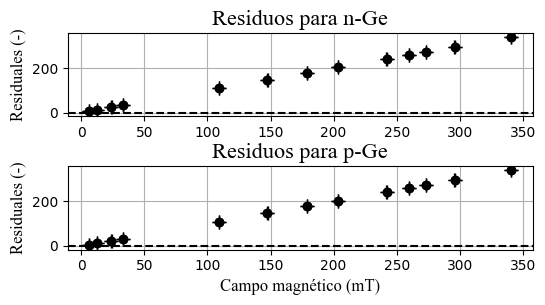

In [265]:
# Gráfico de factor en función del campo para el n-Ge
plt.figure(figsize=(6,8))

plt.subplot2grid((5, 1), (0, 0), rowspan=1)
plt.scatter(field_n, res_n, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(field_n, res_n, xerr=Fn_error, yerr=fac_n_error, fmt='o', capsize=5, color="black")
plt.title('Residuos para n-Ge', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.ylabel('Residuales (-)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplot2grid((5, 1), (1, 0), rowspan=1)
plt.scatter(field_p, res_p, color='black')
plt.axhline(y=0, color='black', linestyle='--')
plt.errorbar(field_n, res_n, xerr=Fp_error, yerr=fac_p_error, fmt='o', capsize=5, color="black")
plt.title('Residuos para p-Ge', loc='center', fontfamily='Times New Roman',fontsize=16)
plt.xlabel('Campo magnético (mT)',fontfamily='Times New Roman',fontsize=12)
plt.ylabel('Residuales (-)',fontfamily='Times New Roman',fontsize=12)
plt.grid()

plt.subplots_adjust(hspace=0.6)
plt.savefig("Residuos magnetoresitencia")
plt.show()

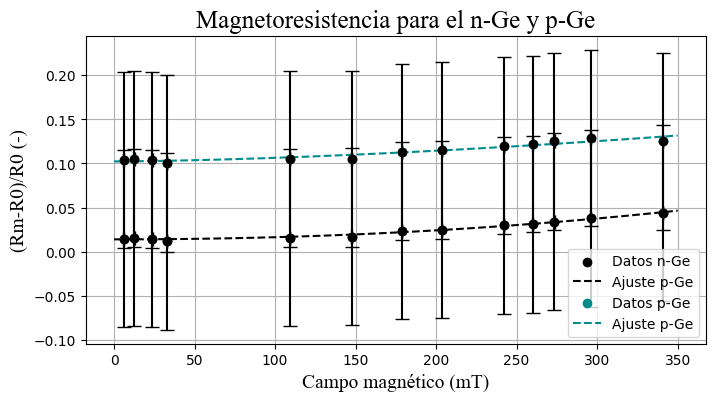

In [263]:
plt.figure(figsize=(8,4))

plt.scatter(field_n, n_fac, color="black", label="Datos n-Ge")
plt.plot(x_n, power(x_n, a_n, b_n, e_n), linestyle='--', color = "black", label = "Ajuste p-Ge")
plt.errorbar(field_n, n_fac, xerr=Fn_error,yerr=fac_p_error, fmt='o', capsize=5, color="black")
plt.scatter(field_p, p_fac, color="#008B8B", label="Datos p-Ge")
plt.plot(x_p, power(x_p, a_p, b_p, e_p), linestyle='--', color = "#008B8B", label = "Ajuste p-Ge")
plt.errorbar(field_p, p_fac, xerr=Fp_error, yerr=fac_p_error, fmt='o', capsize=5, color="black")
plt.xlabel('Campo magnético (mT)',fontfamily='Times New Roman',fontsize=14)
plt.ylabel('(Rm-R0)/R0 (-)',fontfamily='Times New Roman',fontsize=14)
plt.title('Magnetoresistencia para el n-Ge y p-Ge', loc='center', fontfamily='Times New Roman',fontsize=18)
plt.legend()
plt.grid()

plt.savefig("Gráfica magnetoresitencia")
plt.show()